In [4]:
import matplotlib.pyplot as plt
import pandas as pd
plt.close('all')
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
directory= 'results/rl_ttl_strategy_only_no_episodes/cache_capacity_50000/2019_04_25_08_27'
caching_strategy_dir = f'{directory}/ttl_strategy'

Text(0, 0.5, 'Percentage')

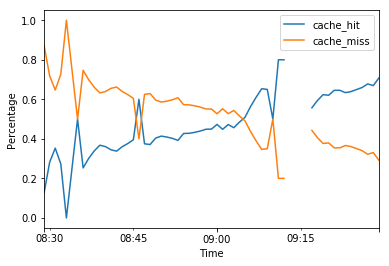

In [15]:
stats_df = pd.read_csv(f'{directory}/cache_hit_logger.log', names=['key', 'cache_hit', 'cache_miss'], parse_dates=True)
ax = stats_df.resample('1T').mean().plot()
ax.set_xlabel("Time")
ax.set_ylabel("Percentage")

Text(0, 0.5, 'Reward')

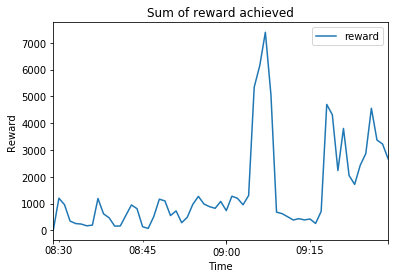

In [16]:
# Useful to compare various RL architecture 
episode_reward_df = pd.read_csv(f'{caching_strategy_dir}/reward_logger.log', names=['reward'], parse_dates=True)
ax = episode_reward_df.resample('1T').sum().plot(title='Sum of reward achieved')
ax.set_xlabel("Time")
ax.set_ylabel("Reward")

/home/samialab/anaconda3/envs/rlcache/lib/python3.7/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


Text(0.5, 0, 'Time')

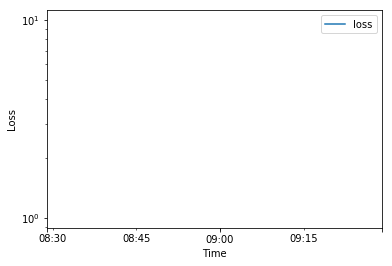

In [17]:
losses_df = pd.read_csv(f'{caching_strategy_dir}/loss_logger.log', names=['loss'], parse_dates=True)

ax = losses_df.resample('1T').sum().plot(logy=True)
ax.set_ylabel("Loss")
ax.set_xlabel("Time")

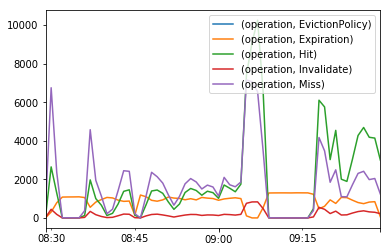

In [18]:
observations_df = pd.read_csv(f'{caching_strategy_dir}/observation_logger.log', names=['key', 'operation'], parse_dates=True)
ax = observations_df.groupby('operation').resample('1T').count().drop(['key'], axis=1).unstack(0).plot()
ax.legend(loc='upper right')